# Part I - (Dataset Exploration Title)
## by Barakah Obileye

## Introduction
The dataset name is "Airline On-Time Performance Data". This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays, from 1987 to 2008.  
But for this project, i'll be working on year 2007,2008 and 2006  


## Investigation Overview  
In  this investigation i want to look at the major causes of flight's delay, i also want to look at the days, month and year that experience the most cancelllation or delay. 

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [4]:
df = pd.read_csv('2006.csv')

In [5]:
df2 = pd.read_csv('2007.csv')

In [6]:
df3 = pd.read_csv('2008.csv')

In [7]:
#Append all three dataframes and save into master df
flight_df=df.append([df2,df3])

C:\Users\HP\AppData\Local\Temp\ipykernel_13016\1049022306.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flight_df=df.append([df2,df3])


In [77]:
flight_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,45.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,27.0,19.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,4.0,11.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,16.0,10.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,27.0,12.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0


In [7]:
flight_df.tail(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
2389207,2008,4,17,4,712.0,720,823.0,844,DL,1203,...,8.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2389208,2008,4,17,4,934.0,940,1036.0,1050,DL,1203,...,4.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2389209,2008,4,17,4,739.0,740,951.0,945,DL,1204,...,6.0,24.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2389210,2008,4,17,4,601.0,600,823.0,819,DL,1205,...,8.0,28.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2389211,2008,4,17,4,1047.0,1050,1248.0,1252,DL,1206,...,8.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2389212,2008,4,17,4,1025.0,1025,1234.0,1237,DL,1207,...,5.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2389213,2008,4,17,4,1319.0,1320,1527.0,1524,DL,1208,...,9.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2389214,2008,4,17,4,1335.0,1335,1556.0,1553,DL,1209,...,7.0,31.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2389215,2008,4,17,4,1933.0,1935,2140.0,2141,DL,1210,...,9.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2389216,2008,4,17,4,621.0,615,752.0,754,DL,1211,...,15.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [8]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16984354 entries, 0 to 2389216
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay     

In [9]:
flight_df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.698435e+07,1.698435e+07,1.698435e+07,1.698435e+07,1.663723e+07,1.698435e+07,1.659821e+07,1.698435e+07,1.698435e+07,1.659821e+07,...,1.698435e+07,1.691426e+07,1.691991e+07,1.698435e+07,1.698435e+07,1.517972e+07,1.517972e+07,1.517972e+07,1.517972e+07,1.517972e+07
mean,2.006720e+03,5.970939e+00,1.571915e+01,3.937186e+00,1.339827e+03,1.331206e+03,1.484658e+03,1.495739e+03,2.191166e+03,1.265325e+02,...,7.241441e+02,6.868338e+00,1.611894e+01,2.043787e-02,2.297350e-03,4.102358e+00,8.110254e-01,4.167233e+00,2.933598e-02,5.435765e+00
std,6.948869e-01,3.496356e+00,8.779192e+00,1.990502e+00,4.785037e+02,4.639545e+02,5.046566e+02,4.807802e+02,1.976456e+03,7.111536e+01,...,5.667792e+02,2.059017e+01,1.149534e+01,1.414926e-01,4.787559e-02,2.113781e+01,9.679868e+00,1.688402e+01,1.209718e+00,2.179563e+01
min,2.006000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.006000e+03,3.000000e+00,8.000000e+00,2.000000e+00,9.300000e+02,9.300000e+02,1.109000e+03,1.115000e+03,5.890000e+02,7.500000e+01,...,3.180000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.007000e+03,6.000000e+00,1.600000e+01,4.000000e+00,1.329000e+03,1.324000e+03,1.515000e+03,1.520000e+03,1.507000e+03,1.080000e+02,...,5.740000e+02,5.000000e+00,1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.007000e+03,9.000000e+00,2.300000e+01,6.000000e+00,1.732000e+03,1.720000e+03,1.911000e+03,1.907000e+03,3.521000e+03,1.570000e+02,...,9.520000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.008000e+03,1.200000e+01,3.100000e+01,7.000000e+00,2.930000e+03,2.359000e+03,2.955000e+03,2.400000e+03,9.741000e+03,1.879000e+03,...,4.962000e+03,1.501000e+03,6.020000e+02,1.000000e+00,1.000000e+00,2.580000e+03,1.429000e+03,1.392000e+03,3.920000e+02,1.366000e+03


In [10]:
flight_df.shape

(16984354, 29)

In [11]:
flight_df.isnull().sum()

Year                        0
Month                       0
DayofMonth                  0
DayOfWeek                   0
DepTime                347124
CRSDepTime                  0
ArrTime                386143
CRSArrTime                  0
UniqueCarrier               0
FlightNum                   0
TailNum                 42474
ActualElapsedTime      386143
CRSElapsedTime           1405
AirTime                386143
ArrDelay               386143
DepDelay               347124
Origin                      0
Dest                        0
Distance                    0
TaxiIn                  70096
TaxiOut                 64442
Cancelled                   0
CancellationCode     16637229
Diverted                    0
CarrierDelay          1804634
WeatherDelay          1804634
NASDelay              1804634
SecurityDelay         1804634
LateAircraftDelay     1804634
dtype: int64

### What is the structure of your dataset?


The dataset has 16984354 rows and 29 columns which are listed below: 
-- Year 
Month 
DayofMonth 
DayOfWeek 
DepTime; this is the flight's departure time  
CRSDepTime;this is the flight's departure time  
ArrTime;this is the flight's arrival time  
CRSArrTime;this is the flight's arrival time  
UniqueCarrier; this is the flight's unique carrier code  
FlightNum ;this is the flight's number  
TailNum;this is the flight's tailnumber  
ActualElapsedTime;The time computed from gate departure time to gate arrival time  
AirTime;Flight's arrival  time  
ArrDelay;Flight's arrival delay time  
DepDelay; Flight's departure delay time
Origin  
Dest ;Flight's destination  
Distance;the distance between origin and destination 
TaxiIn;	The time elapsed between wheels down and arrival at the destination airport gate.  
TaxiOut;The time elapsed between departure from the origin airport gate and wheels off. 
Cancelled; If the flight was cancelled or not  
CancellationCode The cause of the flight cancellation  
Diverted; If the flight was diverted or not  
CarrierDelay; If the flight was delayed by carrier  
WeatherDelay; If the flight was delayed by weather   
NASDelay; If the flight was delayed by NSA   
SecurityDela; If the flight was delayed by security  
LateAircraftDelay; If the flight was delayed by Lateness of Aircraft  


### What is/are the main feature(s) of interest in your dataset?

> What are the main features / factors that are responsible for causing cancellations and delays. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Cancellation Code  
> Year,month, days of the week
> CancellationCode 
Diverted   
Types of Delay


## Univariate Visualization

__Creating a function that assigns labels to charts to avoid code replication__

In [11]:
#Lets first create a function that will name x & y axis and the title of the chart

def chart_labels(x_label,y_label,title):
    plt.title(title, size = 17)
    plt.xlabel(x_label,size = 15)
    plt.ylabel(y_label,size = 15)

### PLOT 1

Below, i'll be taking a look at the distribution of cancellation causes, to visualize the most common causes of flight cancellations.

In [82]:
#getting the counts of the unique values in cancellation Code column
Cancellation_code = flight_df.CancellationCode.value_counts()

[Text(0, 0, 'A'), Text(1, 0, 'B'), Text(2, 0, 'C'), Text(3, 0, 'D')]

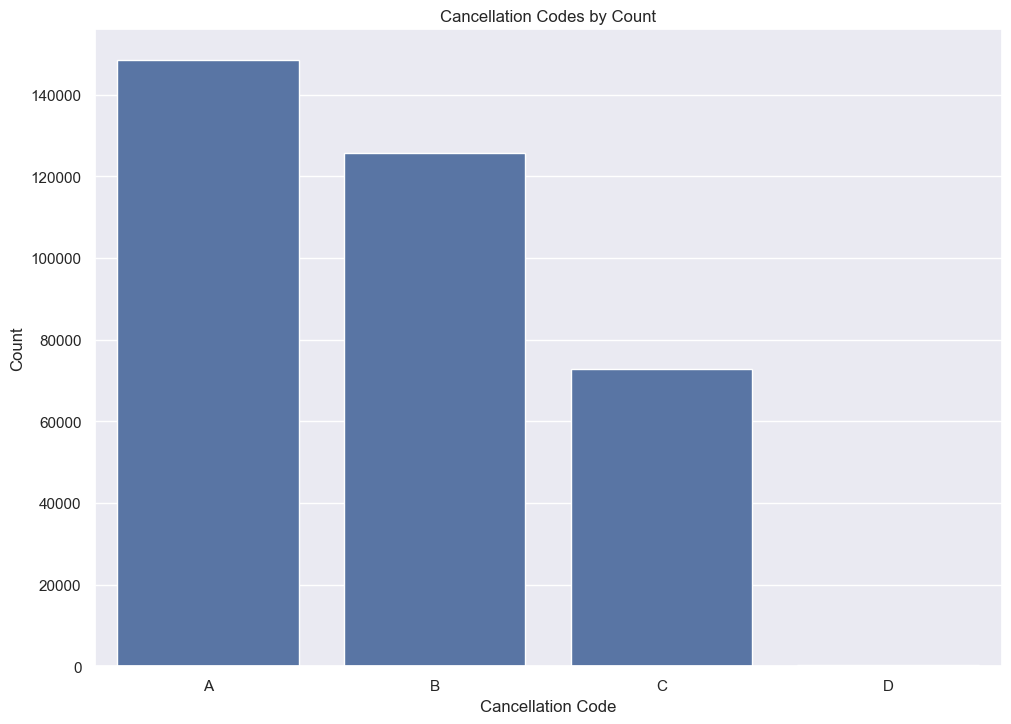

In [83]:
#Define Plot
base_color=sb.color_palette()[0]
g=sb.countplot(data=flight_df,x='CancellationCode',color=base_color,order=Cancellation_code.index)
chart_labels('Cancellation Code','Count','Cancellation Codes by Count')
#g.set_xticklabels(['Carrier','Weather','National Air System','Security']);
g.set_xticklabels(Cancellation_code.index)

It can be seen, that __A__ and __B__ are the most common cause of flight's cancellation and they are codes for __Carrier__ and __Weather__ simultaneously

### PLOT 2

Which day had the most cancellations?

In [9]:
#Getting a subset of original dataframe that contains only cancellation date
flight_cancelled=flight_df.query('CancellationCode in ["A","B","C","D"]')

In [19]:
day_values = flight_cancelled.DayOfWeek.value_counts()

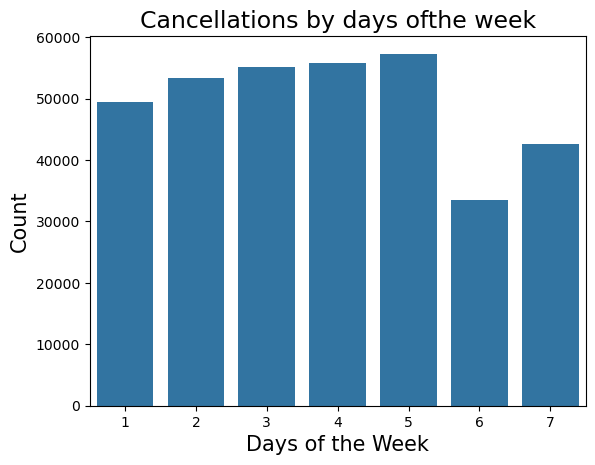

In [12]:
#Define Plot
#Define day of the weeekPlot
base_color=sb.color_palette()[0]
day_order=[1,2,3,4,5,6,7]
sb.countplot(data=flight_cancelled,x='DayOfWeek',color=base_color,order=day_order)
chart_labels('Days of the Week','Count','Cancellations by days ofthe week');


It can be seen that __Day 5__ (Thursday) experienced the most cancellation  

### PLOT 3

Which month  had the most cancellations?

In [13]:
month_values=flight_cancelled.Month.value_counts()

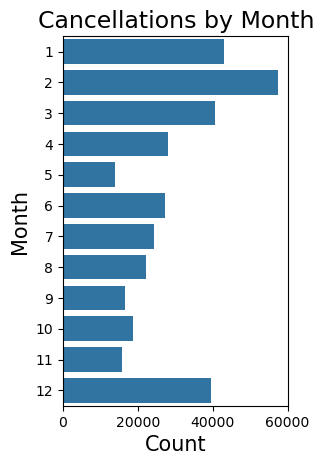

In [14]:
#Define month Plot
plt.subplot(1,2,2)
month_order=[1,2,3,4,5,6,7,8,9,10,11,12]
sb.countplot(data=flight_cancelled,y='Month',color=base_color,order=month_order)
chart_labels('Count','Month','Cancellations by Month');


 
It can be seen that __month 2__ (February) has the most cancellation  

### PLOT 4

Which year had the most cancellation

In [23]:
year_values = flight_cancelled.Year.value_counts()

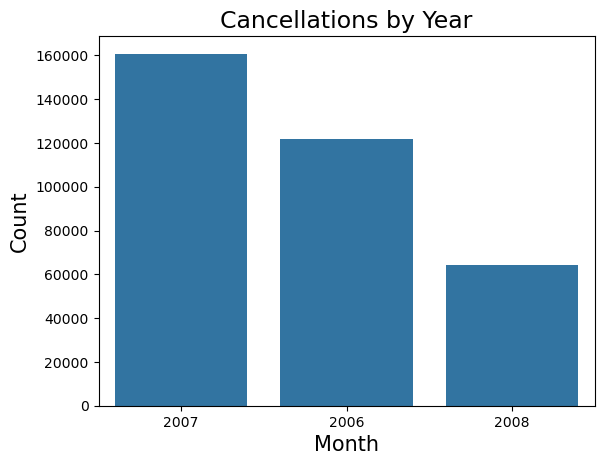

In [24]:
#Define year Plot
sb.countplot(data=flight_cancelled,x='Year',color=base_color,order=year_values.index)
chart_labels('Month','Count','Cancellations by Year');

It can be seen that the year 2007 experienced the most cancellation  

### PLOT 5

### Which carrier had the most cancellation

Which carrier has the most cancellation

In [25]:
Unique_carrier_values=flight_cancelled.UniqueCarrier.value_counts()

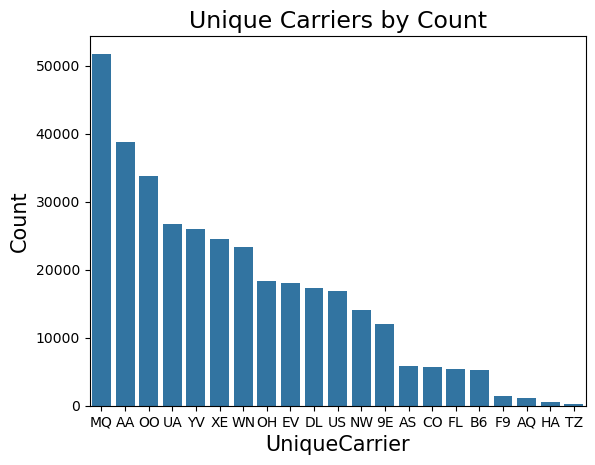

In [26]:
#Define cancellation Plot
base_color=sb.color_palette()[0]
g=sb.countplot(data=flight_cancelled,x='UniqueCarrier',color=base_color,order=Unique_carrier_values.index)
chart_labels('UniqueCarrier','Count','Unique Carriers by Count')
g.set_xticklabels(Unique_carrier_values.index);


The plot above shows that __MQ(Envoy Air), AA(American Airlines), OO(SkyWest Airlines)__ are the top three carriers with highest cancellations.  

### PLOT 6

### Which carrier was the most delayed  

Which carrier was delayed the most

In [29]:
Unique_carrier_value=flight_df.UniqueCarrier.value_counts()

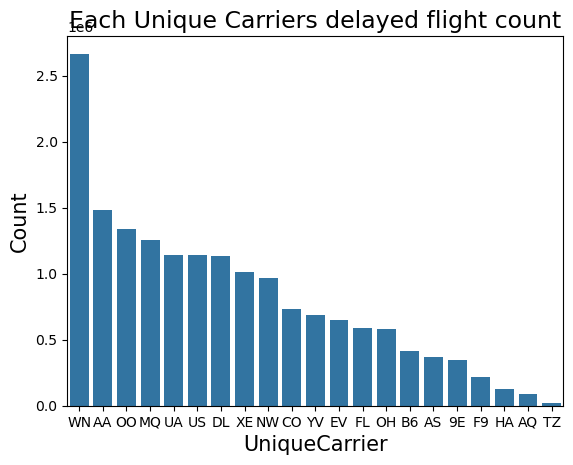

In [30]:
#Define Plot
base_color=sb.color_palette()[0]
g=sb.countplot(data=flight_df,x='UniqueCarrier',color=base_color,order=Unique_carrier_value.index)
chart_labels('UniqueCarrier','Count','Each Unique Carriers delayed flight count')
g.set_xticklabels(Unique_carrier_value.index);



It can be seen that __WN(South west airlines) followed by AA(American Airlines), then OO(Sky west Airlines)__ has the most delayed flights

### PLOT 7

How many minutes does theflight gets delayed for most

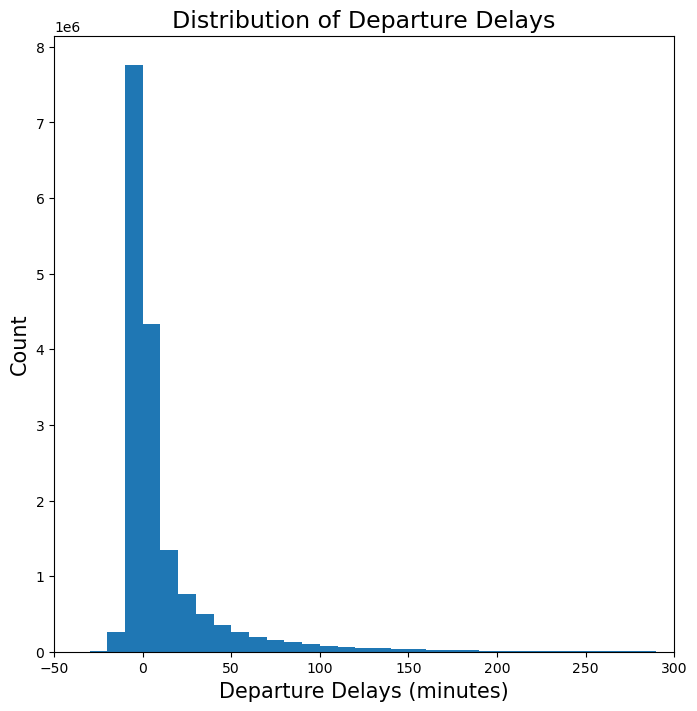

In [31]:
#Define plot
plt.figure(figsize=(8,8))
bin_edges=np.arange(-100,300,10)
plt.hist(flight_df.DepDelay,bins=bin_edges)
plt.xlim(-50,300)
chart_labels('Departure Delays (minutes)','Count','Distribution of Departure Delays')

It can be seen from the graph above that the distributionis skewed right and the most of the delays are between __0 and 50__

### PLOT 8

Which days had the most delayed flights?

In [16]:
#Getting a subset of original dataframe that contains only delayed flights data
flight_delayed=flight_df[flight_df.DepDelay.notnull()]

In [19]:
flight_delayed.DayOfWeek.value_counts()

1    2459133
5    2451564
4    2444669
3    2442293
2    2414473
7    2337640
6    2087458
Name: DayOfWeek, dtype: int64

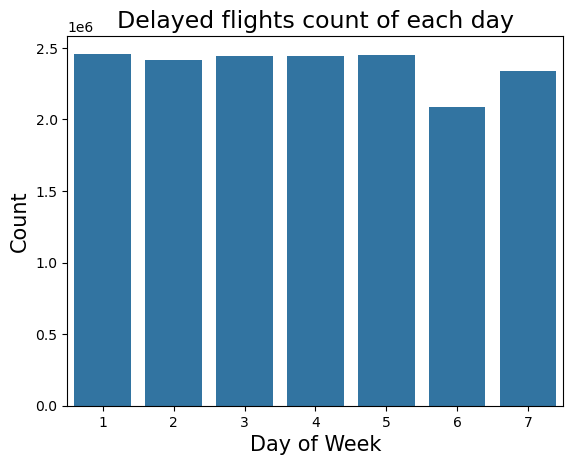

In [18]:
#Define Plot
day_order=[1,2,3,4,5,6,7]
sb.countplot(data=flight_delayed,x='DayOfWeek',color=base_color,order=day_order)
chart_labels('Day of Week','Count','Delayed flights count of each day');


As it can be seen from the graph above, __Day 1 (Sunday)__ experienced the most delayed flights  

### PLOT 9

Which month had the most delayed flights?

In [20]:
Dmonth_values=flight_delayed.Month.value_counts()

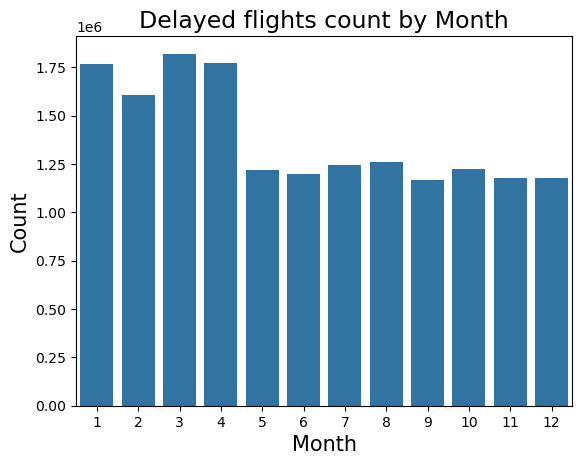

In [21]:

#Define Plot
month_order=[1,2,3,4,5,6,7,8,9,10,11,12]
sb.countplot(data=flight_delayed,x='Month',color=base_color,order=month_order)
chart_labels('Month','Count','Delayed flights count by Month');





As it can be seen from the graph above, __Month 3 (March)__ experienced the most delayed flights

## Bivariate Visualization

### PLOT 10

The heatmap below will allow us to better understand the correlation between numeric variables in the dataset

<AxesSubplot:>

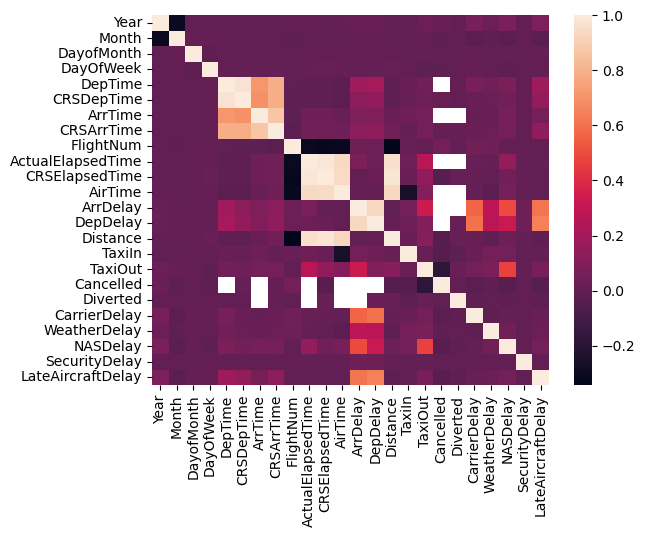

In [8]:
sb.heatmap(flight_df.corr())

It can be seen that :  
    There's correlation between arrival delay and departure delay  
    There's a slight correlation between Late Aircraft Delay and Arrival and departure delay  
    There's a 0.6 correlation between Carrier delay and Arrival and departure delay

### PLOT 11

Is there a positive correlation between Arrival delay and Departure delay

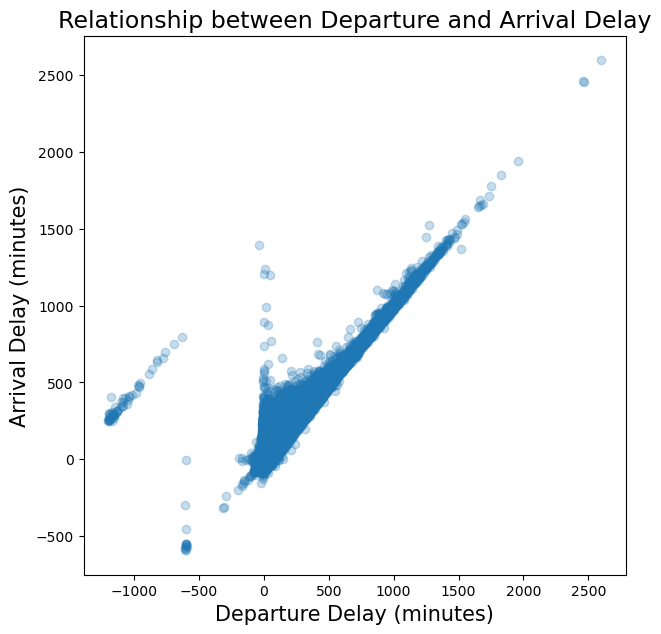

In [37]:
#Define plot
plt.figure(figsize=(7,7))
plt.scatter(data=flight_df,x='DepDelay',y='ArrDelay',alpha=1/4)
chart_labels('Departure Delay (minutes)','Arrival Delay (minutes)','Relationship between Departure and Arrival Delay')

There's correlation between arrival delay and departure delay  

### PLOT 12

Is there a positive correlation between Carrier Delay and Arrival and departure delay

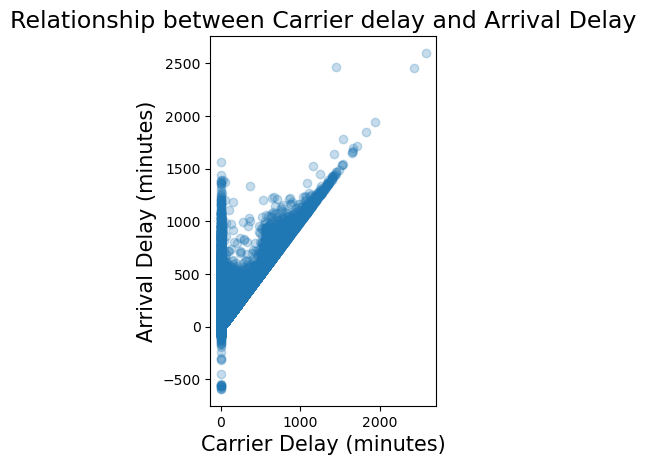

In [40]:
#Define plot for Carrier and Arrival delay
plt.subplot(1,2,1)
plt.scatter(data=flight_df,x='CarrierDelay',y='ArrDelay',alpha=1/4)
chart_labels('Carrier Delay (minutes)','Arrival Delay (minutes)','Relationship between Carrier delay and Arrival Delay')





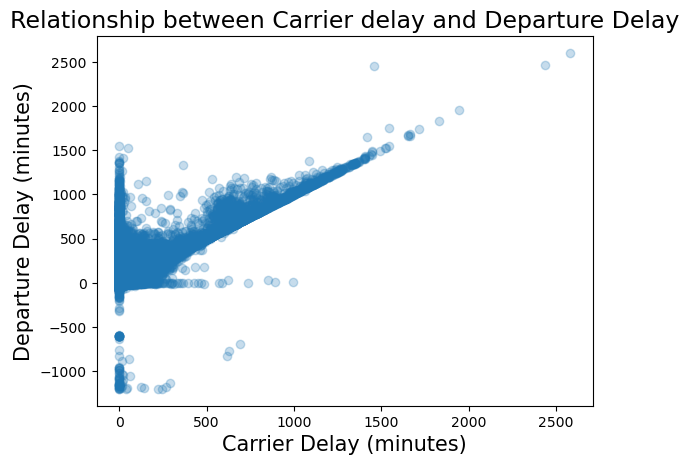

In [41]:
#Define plot for Carrier and Departure delay
plt.scatter(data=flight_df,x='CarrierDelay',y='DepDelay',alpha=1/4)
chart_labels('Carrier Delay (minutes)','Departure Delay (minutes)','Relationship between Carrier delay and Departure Delay')


### PLOT 13
For each cancellation code,which month has the most cancelled flight

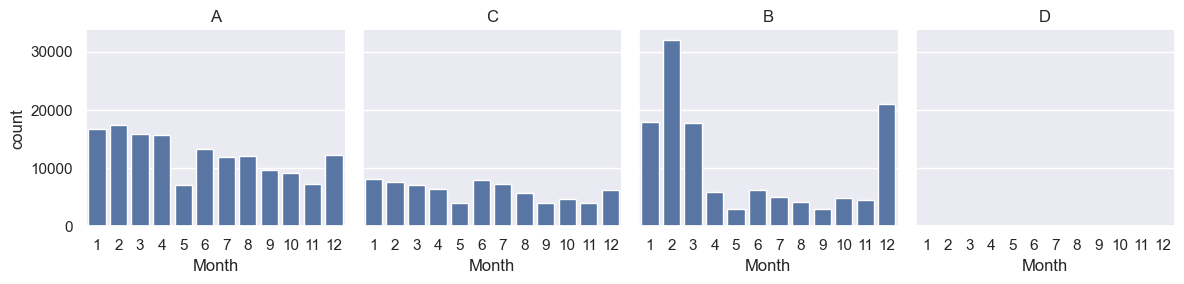

In [97]:
#Define facetgrid plot
month_order=[1,2,3,4,5,6,7,8,9,10,11,12]
g=sb.FacetGrid(data=flight_cancelled,col='CancellationCode')
g.map(sb.countplot,'Month',order=month_order)
g.set_titles("{col_name}");

It can be seen that for :
Cancellation Code A (Carrier); month 2(February) has the most cancellations
Cancellation Code B (Weather); month 2(February) has the most cancellations
Cancellation Code C (National Air system); month 6(June) has the most cancellations

## Multivariate Visualization

### PLOT 14

For each cancellation code,which month has the most cancelled flight, ordering the chart by year

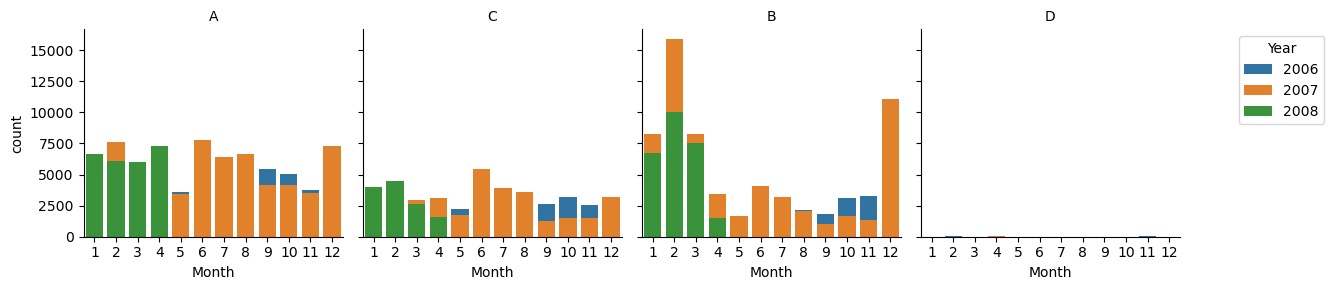

In [43]:
#Define facetgrid plot
month_order=[1,2,3,4,5,6,7,8,9,10,11,12]
g=sb.FacetGrid(data=flight_cancelled,col='CancellationCode', hue= 'Year')
g.map(sb.countplot,'Month',order=month_order)
g.set_titles("{col_name}");
plt.legend(title='Year', bbox_to_anchor=(1.2, 1));

### PLOT 15

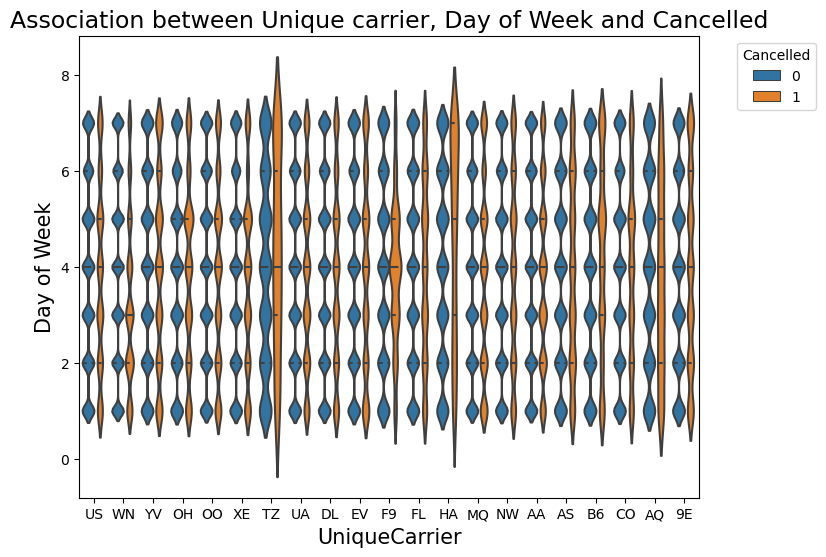

In [16]:
# Setting the width and height of the plot
# ploting the association

plt.figure(figsize = [8, 6])
sb.violinplot(data = flight_df, x = 'UniqueCarrier', y = 'DayOfWeek', hue = 'Cancelled', inner = 'quartile')

# Format the plot's visual
chart_labels('UniqueCarrier','Day of Week','Association between Unique carrier, Day of Week and Cancelled')
plt.legend(title='Cancelled', bbox_to_anchor=(1.2, 1));


### PLOT 16

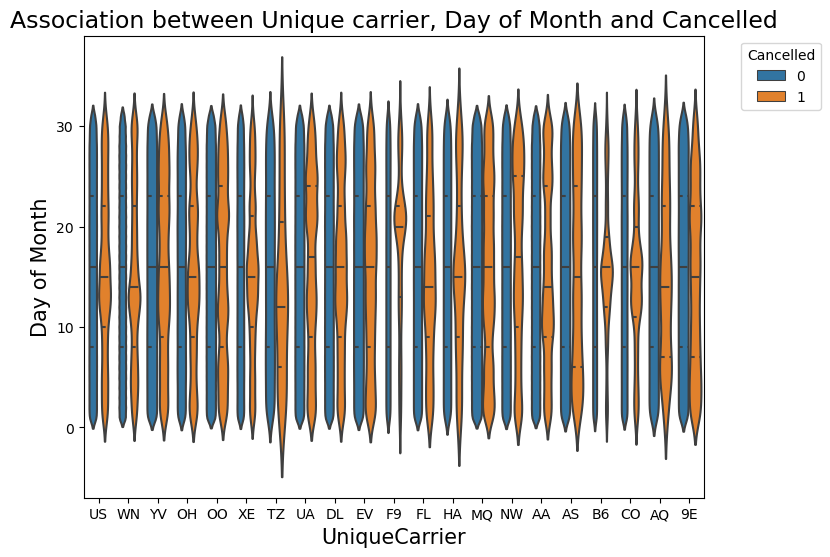

In [12]:
# Setting the width and height of the plot
# ploting the association

plt.figure(figsize = [8, 6])
sb.violinplot(data = flight_df, x = 'UniqueCarrier', y = 'DayofMonth', hue = 'Cancelled', inner = 'quartile')

# Format the plot's visual
chart_labels('UniqueCarrier','Day of Month','Association between Unique carrier, Day of Month and Cancelled')
plt.legend(title='Cancelled', bbox_to_anchor=(1.2, 1));


## Conclusions
>The following are the important findings of the above analysis as a result of the above data investigation and exploration:  
Most cancellation is caused by carrier  
Envoy Air has the most  cancellation  
The year 2007 experienced the most cancellation  
February is the month that experience the most flight cancellations  
Thursday experienced the most cancellation  
There's no correlation between cancellation and delayed
March experienced the most delayed flights  
Most flights are delayed for 0-50 mins  
Sunday experioenced the most delayed flights  
South west Airlines delayed most of their flights
